In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ознакомление с данными вакансий

In [2]:
df = pd.read_csv('ml.csv')

Загрузим данные о собранных нами ранее вакансиях. <p>
Рассмотрим частоту требований навыков в вакансиях

In [3]:
df.head()

,Должность,Ссылка,Компания,Зарплата,Опыт,Удаленная работа,PYTHON,TENSORFLOW,PYTORCH,SCIKIT_LEARN,...,NUMPY,MATPLOTLIB,SQL,DEEP_LEARNING,COMPUTER_VISION,NLP,MATH,GIT,DOCKER,CLOUD
0,Chief Data Officer,https://hh.ru/vacancy/119826788,HAAS PLATFORM,не указана,Более 6 лет,Нет,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Программист Машинного обучения/ ML Engineer/ М...,https://hh.ru/vacancy/119277805,Группа компаний «Триумф»,не указана,От 1 года до 3 лет,Нет,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
2,ML engineer,https://hh.ru/vacancy/119813378,Эйчар Рокет,не указана,От 1 года до 3 лет,Да,1,1,1,0,...,0,0,0,0,0,0,1,0,0,0
3,Разработчик ML,https://hh.ru/vacancy/119787194,FIX PRICE,не указана,От 1 года до 3 лет,Да,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,ML разработчик/Data scientist,https://hh.ru/vacancy/119710027,Аналитический центр при Правительстве Российск...,не указана,От 1 года до 3 лет,Нет,1,0,1,1,...,1,1,0,0,0,0,0,1,0,0


Создаём отсортированную таблицу наиболее встречающихся навыков

In [4]:
skills = df.iloc[:, 6:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)
skills_sum = skills.sum().sort_values(ascending=False)
skills_sum

<ipython-input-4-949e5ef89265>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  skills = df.iloc[:, 6:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)


,0
PYTHON,298
SQL,202
PYTORCH,130
PANDAS,113
SCIKIT_LEARN,104
GIT,104
DOCKER,100
NLP,97
NUMPY,87
TENSORFLOW,74


Визуализируем данные

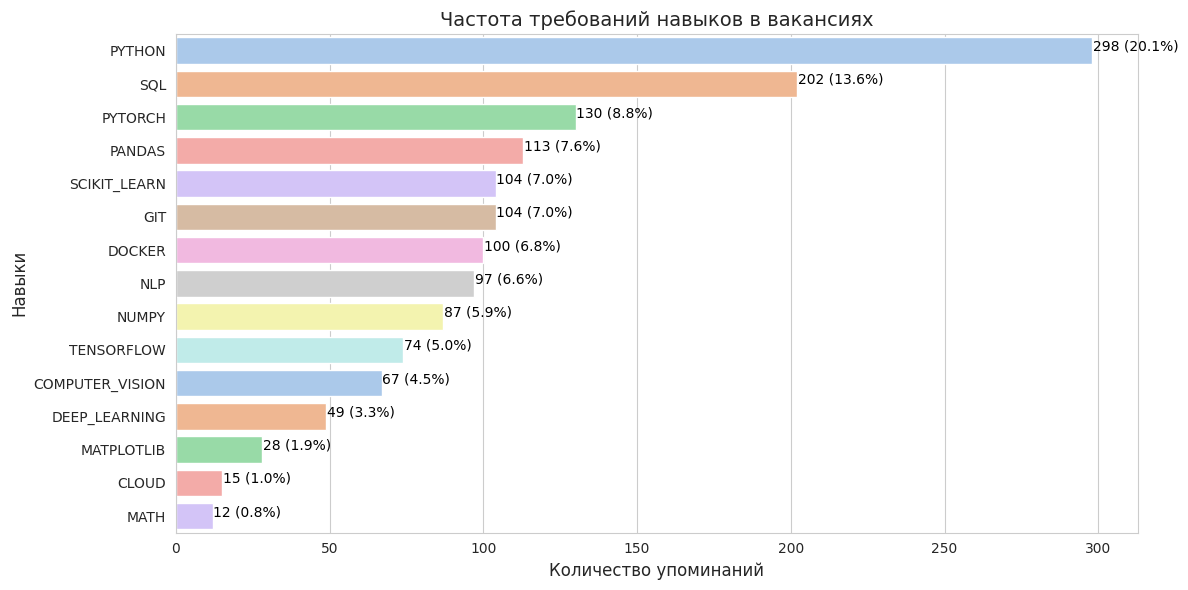

In [5]:

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=skills_sum.values,
    y=skills_sum.index,
    hue=skills_sum.index,
    palette="pastel",
    legend=False
)

percentages = (skills_sum.values / skills_sum.values.sum()) * 100

for i, (v, p) in enumerate(zip(skills_sum.values, percentages)):
    ax.text(v + 0.2, i, f"{int(v)} ({p:.1f}%)", color='black', ha='left')

plt.title('Частота требований навыков в вакансиях', fontsize=14)
plt.xlabel('Количество упоминаний', fontsize=12)
plt.ylabel('Навыки', fontsize=12)
plt.tight_layout()

plt.show()

# Обработка данных

Преобразуем все категориальные признаки к численному формату данных, чтобы нам было удобнее с ними работать.

In [6]:
experience_mapping = {
    'Нет опыта': 0,
    'От 1 года до 3 лет': 2,  # среднее между 1 и 3
    'От 3 до 6 лет': 4.5,     # среднее между 3 и 6
    'Более 6 лет': 7           # можно задать условное значение
}

df['exp_in_num'] = df['Опыт'].map(experience_mapping)

In [7]:
df.describe()

,PYTHON,TENSORFLOW,PYTORCH,SCIKIT_LEARN,PANDAS,NUMPY,MATPLOTLIB,SQL,DEEP_LEARNING,COMPUTER_VISION,NLP,MATH,GIT,DOCKER,CLOUD,exp_in_num
count,386.000000,386.000000,386.000000,386.00000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.00000,386.000000,386.000000,386.000000
mean,0.772021,0.191710,0.336788,0.26943,0.292746,0.225389,0.072539,0.523316,0.126943,0.173575,0.251295,0.031088,0.26943,0.259067,0.038860,3.981865
std,0.420074,0.394157,0.473225,0.44424,0.455613,0.418380,0.259715,0.500104,0.333341,0.379235,0.434321,0.173781,0.44424,0.438691,0.193512,1.675936
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,2.000000
50%,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,4.500000
75%,1.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,1.00000,1.000000,0.000000,4.500000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,7.000000


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Удаленная работа (код)'] = le.fit_transform(df['Удаленная работа'])

In [9]:
print(df.iloc[:, 3].dtype)

object


In [10]:
for i in range(len(df)):
  if df.iloc[i, 3] == 'не указана':
    df.iloc[i, 3] = np.nan
    continue

  text = str(df.iloc[i, 3]).split()
  if len(text) == 5:
    df.iloc[i, 3] = float((int(text[1]) + int(text[3])) // 2)
  if len(text) == 3:
    df.iloc[i, 3] = float(int(text[1]))
  if text[-1] == 'USD' or text[-1] == 'EUR':
    df.iloc[i, 3] = float(df.iloc[i, 3] * 80)
df['Зарплата'] = pd.to_numeric(df['Зарплата'], errors='coerce').astype('Int64')

In [11]:
df

,Должность,Ссылка,Компания,Зарплата,Опыт,Удаленная работа,PYTHON,TENSORFLOW,PYTORCH,SCIKIT_LEARN,...,SQL,DEEP_LEARNING,COMPUTER_VISION,NLP,MATH,GIT,DOCKER,CLOUD,exp_in_num,Удаленная работа (код)
0,Chief Data Officer,https://hh.ru/vacancy/119826788,HAAS PLATFORM,<NA>,Более 6 лет,Нет,0,0,0,0,...,0,0,0,0,0,0,0,0,7.0,1
1,Программист Машинного обучения/ ML Engineer/ М...,https://hh.ru/vacancy/119277805,Группа компаний «Триумф»,<NA>,От 1 года до 3 лет,Нет,0,1,1,0,...,0,0,1,0,0,0,0,0,2.0,1
2,ML engineer,https://hh.ru/vacancy/119813378,Эйчар Рокет,<NA>,От 1 года до 3 лет,Да,1,1,1,0,...,0,0,0,0,1,0,0,0,2.0,0
3,Разработчик ML,https://hh.ru/vacancy/119787194,FIX PRICE,<NA>,От 1 года до 3 лет,Да,1,0,0,0,...,1,0,0,0,0,0,1,0,2.0,0
4,ML разработчик/Data scientist,https://hh.ru/vacancy/119710027,Аналитический центр при Правительстве Российск...,<NA>,От 1 года до 3 лет,Нет,1,0,1,1,...,0,0,0,0,0,1,0,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381,Senior Data Scientist/ML Engineer (команда Sma...,https://hh.ru/vacancy/119500510,СБЕР,<NA>,От 3 до 6 лет,Нет,1,0,1,0,...,1,0,0,1,0,0,0,0,4.5,1
382,Senior Data Scientist (Recommender Systems),https://hh.ru/vacancy/115557998,FunCorp,460000,От 3 до 6 лет,Да,1,0,1,0,...,0,0,0,0,0,0,0,0,4.5,0
383,"Автор на курс ""Специалист по Data Science""",https://hh.ru/vacancy/118562501,Яндекс Практикум,<NA>,От 3 до 6 лет,Нет,1,0,1,1,...,0,1,1,1,0,0,0,0,4.5,1
384,Senior Data Scientist/ML Engineer (команда Sma...,https://hh.ru/vacancy/116788944,СБЕР,<NA>,От 3 до 6 лет,Нет,1,0,0,0,...,0,0,0,0,0,0,0,0,4.5,1


## Заполнение пропусков зарплаты

Так как в столбце зарплата огромное количество пропусков попытаемся заполнить их предсказанными значениями. Для этого обучим две модели (KNN, RandomForest) и воспользуемся лучшей моделью для заполнения неизвестных значений

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [13]:
not_null_salaries = df.iloc[df['Зарплата'].notna().values]

X_train, X_test, y_train, y_test = train_test_split(
    not_null_salaries.iloc[:, 6::],
    not_null_salaries.iloc[:, 3],
    test_size=0.15,
    random_state=10
)
X_train.shape, X_test.shape

((34, 17), (6, 17))

In [14]:
params = {'n_neighbors': [2, 3, 4, 5], 'metric': ['euclidean', 'manhattan', 'minkowski']}
knn = KNeighborsRegressor()
model = GridSearchCV(knn, params)

model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

-0.1062646415205549 {'metric': 'euclidean', 'n_neighbors': 5}


In [15]:
knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5592919873245812

In [16]:
from sklearn.metrics import mean_absolute_error

y_pred = knn.predict(X_test)
df_pred_real = pd.DataFrame({'predict': y_pred, 'real': y_test})
print(mean_absolute_error(y_pred, y_test))
df_pred_real

77166.66666666667


,predict,real
11,182000.0,160000
162,282000.0,200000
251,315000.0,400000
206,82000.0,75000
77,84000.0,75000
68,292000.0,550000


In [17]:
from sklearn.tree import DecisionTreeRegressor

params = {'criterion': ['squared_error', 'absolute_error'],
          'max_depth': [None, 3, 5, 7, 10],
          'min_samples_split': [2, 5, 10, 15],
          'min_samples_leaf': [1, 2, 4, 6], }

tree = DecisionTreeRegressor(random_state=10)
model = GridSearchCV(tree, params)
model.fit(X_train, y_train)
print(model.best_score_, model.best_params_)

0.13223032029229995 {'criterion': 'absolute_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [18]:
clf = DecisionTreeRegressor(random_state=10, criterion='absolute_error', min_samples_leaf=6, min_samples_split=15)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5131281122679945

In [19]:
y_pred = clf.predict(X_test)
df_pred_real = pd.DataFrame({'predict': y_pred, 'real': y_test})
print(mean_absolute_error(y_pred, y_test))
df_pred_real

90833.33333333333


,predict,real
11,135000.0,160000
162,280000.0,200000
251,350000.0,400000
206,135000.0,75000
77,135000.0,75000
68,280000.0,550000


KNN показало себя лучше всего, предскажем пустые ячейки зарплаты с помощью этой модели

In [20]:
for i in range(len(df)):
  if pd.isna(df.iloc[i, 3]):
    features = df.iloc[i, 6:].values.reshape(1, -1)
    df.iloc[i, 3] = clf.predict(features)[0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/

{'whiskers': [<matplotlib.lines.Line2D at 0x7e8125c9d8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7e8125c9ed90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7e812cec0650>],
 'medians': [<matplotlib.lines.Line2D at 0x7e8125cb0290>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e8125cb0c90>],
 'means': []}

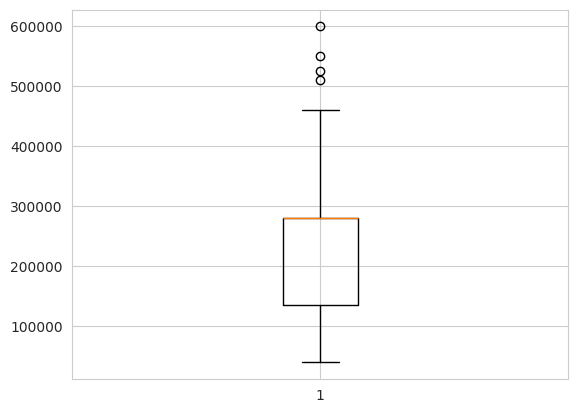

In [21]:
plt.boxplot(df[['Зарплата']])

(array([  6., 103.,   9.,  59., 119.,  80.,   2.,   4.,   2.,   2.]),
 array([ 40000.,  96000., 152000., 208000., 264000., 320000., 376000.,
        432000., 488000., 544000., 600000.]),
 <BarContainer object of 10 artists>)

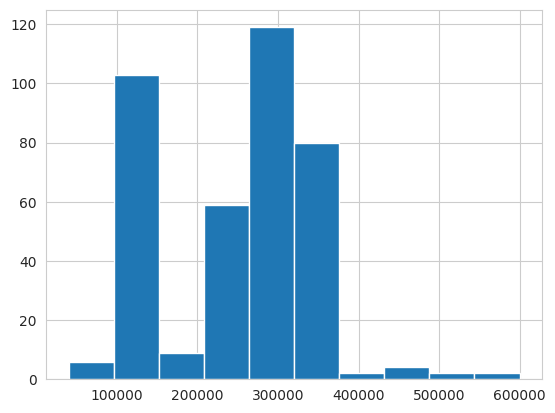

In [22]:
plt.hist(df[['Зарплата']])

# Анализ данных вакансий

In [23]:
print(df[['Зарплата']].median(), df[['Зарплата']].mean(), sep='\n')

Зарплата    280000.0
dtype: Float64
Зарплата    250533.678756
dtype: Float64


In [24]:
df = df.rename(columns={
    'exp_in_num': 'Опыт работы',
})

In [25]:
data_skills = list(df.keys())[6:] + ['Зарплата']

<Axes: >

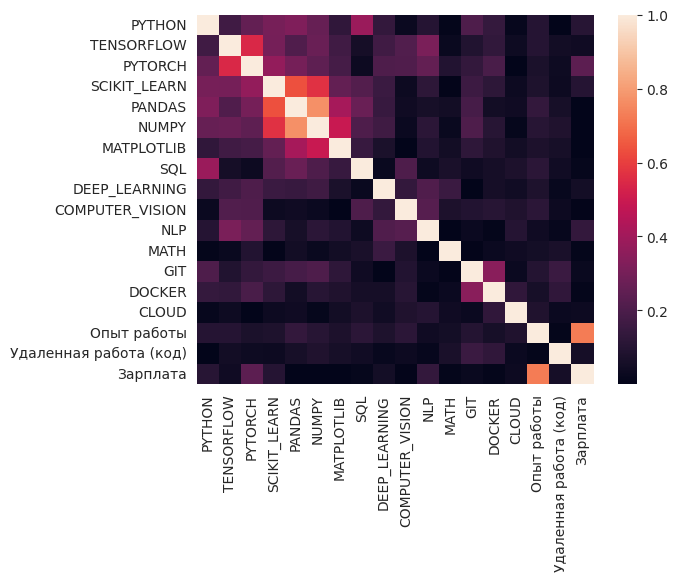

In [26]:
corr_df = df[data_skills].corr().abs()

sns.heatmap(corr_df,
            xticklabels=corr_df.columns.values,
            yticklabels=corr_df.columns.values)

В матрице корреляций можно заметить, что зарплата лучшего всего коррелирует с опытом работы (значение почти 0.7), с остальными значение около 0.1-0.3
Также из этой матрицы можно заметить, что Python хорошо коррелирует с библиотеками для машинного обучения, что и логично, так как они и написаны на этом языке...

# Анализ данных по вузам

In [27]:
df_students = pd.read_csv('uni.csv')

<ipython-input-28-266f753546b4>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  skills = df_students.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)


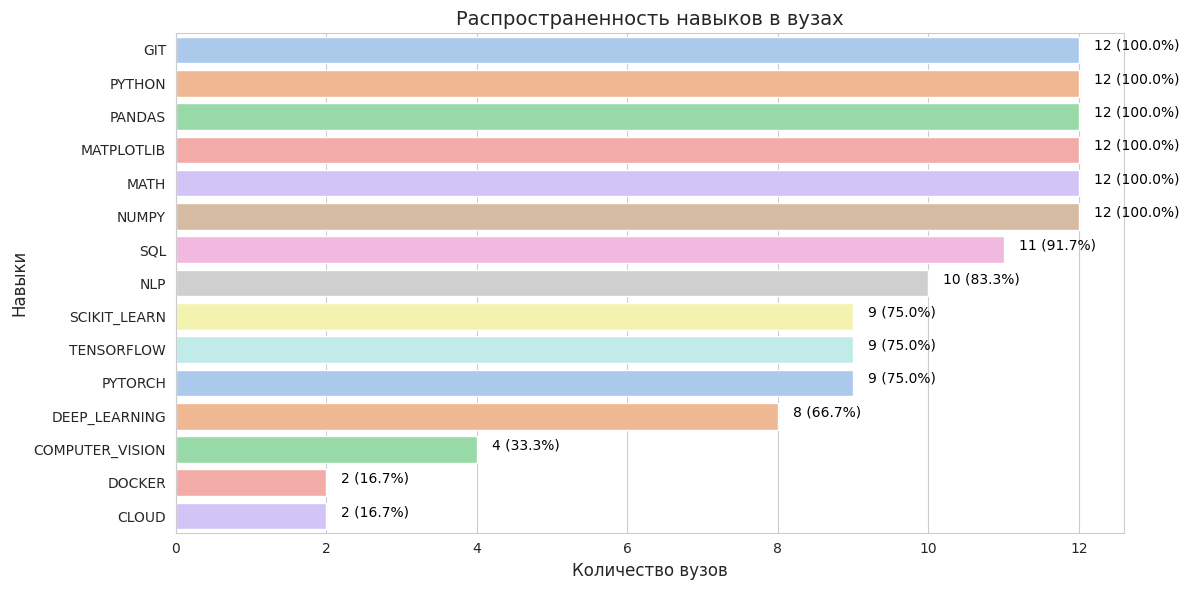

In [28]:
skills = df_students.iloc[:, 1:].applymap(lambda x: 1 if str(x).strip() in ['PYTHON', 'SQL', '1'] else 0)
skills_sum = skills.sum().sort_values(ascending=False)


skills_count = (skills > 0).sum().sort_values(ascending=False)
total_vuz = len(df_students)  # Общее количество вузов

plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

ax = sns.barplot(
    x=skills_count.values,
    y=skills_count.index,
    hue=skills_count.index,
    palette="pastel",
    legend=False
)

percentages = (skills_count / total_vuz) * 100

for i, (v, p) in enumerate(zip(skills_count.values, percentages)):
    ax.text(v + 0.2, i, f"{int(v)} ({p:.1f}%)", color='black', ha='left')

plt.title('Распространенность навыков в вузах', fontsize=14)
plt.xlabel('Количество вузов', fontsize=12)
plt.ylabel('Навыки', fontsize=12)
plt.tight_layout()
plt.show()

# Анализ навыков требуемых работодалями с тем, что дают вузы

Визуализируем спрос по каждому навыку на рынке труда с учётом предложения вузов

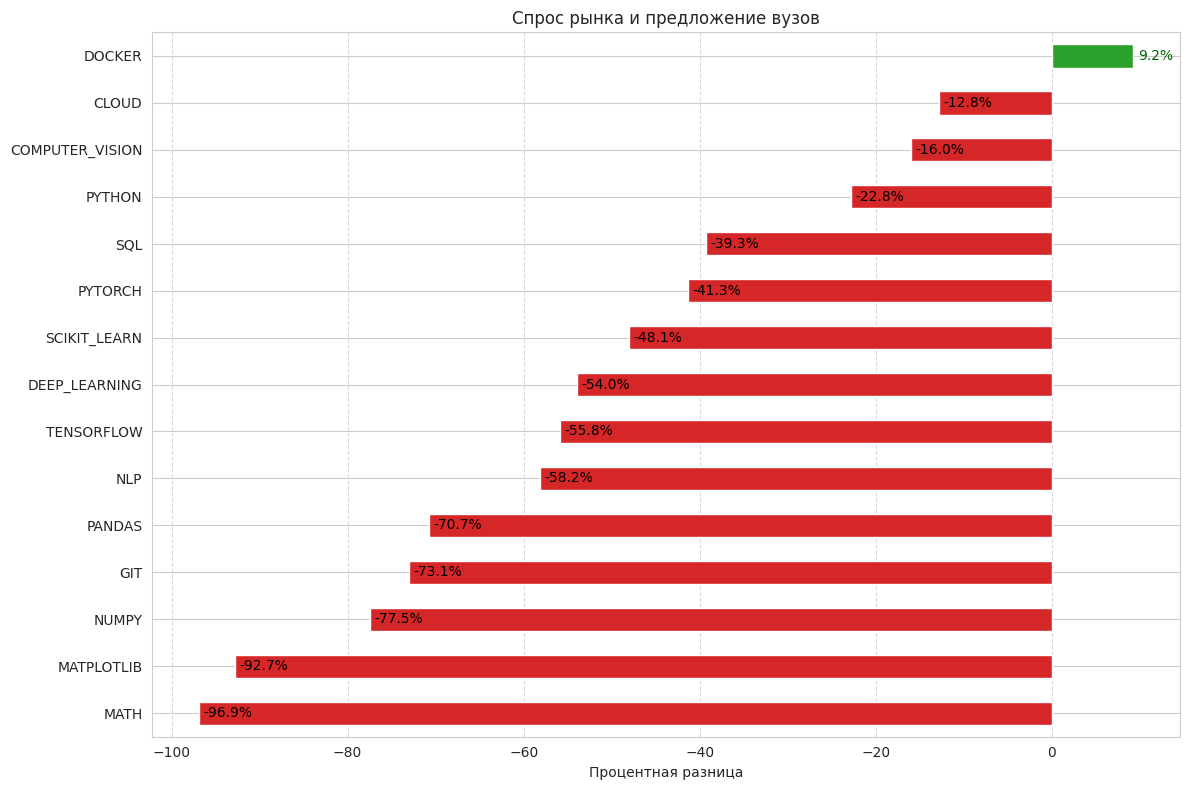

In [29]:
vacancies = pd.read_csv('ml.csv',
                        dtype={col: 'Int64' for col in [
                            'GIT', 'DOCKER', 'KUBERNETES',
                            'PYTHON', 'TENSORFLOW', 'PYTORCH', 'SCIKIT_LEARN',
                            'PANDAS', 'NUMPY', 'MATPLOTLIB', 'SEABORN', 'SQL',
                            'DEEP_LEARNING', 'COMPUTER_VISION', 'NLP', 'MATH', 'CLOUD'
                        ]})

universities = pd.read_csv('uni.csv')

def get_tech_counts1(df):
    tech_columns = df.columns[1:]
    numeric_df = df[tech_columns].apply(pd.to_numeric, errors='coerce')
    return numeric_df.sum().sort_values(ascending=False)


def get_tech_counts6(df):
    tech_columns = df.columns[6:]
    numeric_df = df[tech_columns].apply(pd.to_numeric, errors='coerce')
    return numeric_df.sum().sort_values(ascending=False)

vacancy_counts = get_tech_counts6(vacancies)
uni_counts = get_tech_counts1(universities)

vacancy_pct = vacancy_counts / len(vacancies) * 100
uni_pct = uni_counts / len(universities) * 100

comparison = pd.DataFrame({
    'Спрос на рынке': vacancy_pct,
    'В программах вузов': uni_pct
}).fillna(0)

comparison['Разрыв'] = comparison['Спрос на рынке'] - comparison['В программах вузов']

sorted_gap = comparison.sort_values('Разрыв', ascending=True)

plt.figure(figsize=(12, 8))
sorted_gap['Разрыв'].plot.barh(color=[
    '#d62728' if x < 0 else '#2ca02c' for x in sorted_gap['Разрыв']
])

plt.title('Спрос рынка и предложение вузов')
plt.xlabel('Процентная разница')
plt.grid(axis='x', linestyle='--', alpha=0.7)

for i, v in enumerate(sorted_gap['Разрыв']):
    plt.text(v + 0.5, i, f'{v:.1f}%', color='black' if v < 0 else 'darkgreen', va='center')

plt.tight_layout()
plt.show()

Средний разрыв по всем навыкам

In [30]:
average_gap = comparison['Разрыв'].mean()
absolute_average_gap = comparison['Разрыв'].abs().mean()

print(f"Средний разрыв (с учетом знака): {average_gap:.2f}%")
print(f"Средний абсолютный разрыв: {absolute_average_gap:.2f}%")

Средний разрыв (с учетом знака): -49.99%
Средний абсолютный разрыв: 51.23%


Средний разрыв показывает, что в среднем  вузы дают больше навыков, чем требуется рынком, а абсолютный показатель конкретизирует, что в среднем  расхождение между спросом и предложением составляет почти 50%



Выведем все навыки в которых есть разрыв

In [31]:
comparison[comparison['Разрыв'] >= 0].sort_values('Разрыв',ascending=False)

,Спрос на рынке,В программах вузов,Разрыв
DOCKER,25.906736,16.666667,9.240069


Выведем все навыки в которых разрыва нет (со стороны вузов)

In [32]:
comparison.sort_values('Разрыв').iloc[:5,:]

,Спрос на рынке,В программах вузов,Разрыв
MATH,3.108808,100.0,-96.891192
MATPLOTLIB,7.253886,100.0,-92.746114
NUMPY,22.53886,100.0,-77.46114
GIT,26.943005,100.0,-73.056995
PANDAS,29.274611,100.0,-70.725389


В итоге разрыв существует в ряде технологий, но основную часть формально преподают.